In [2]:
import os, glob
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Recommend System"

import pandas as pd
from pandas import DataFrame,Series
import json
import csv

Mounted at /content/drive


In [3]:
os.chdir(path)
os.listdir(path)

['recommendation-systems-with-the-elastic-stack-additional-resources.pdf',
 '2827872.pdf',
 'top10000_movies.csv',
 'upcoming_movies.csv',
 '.ipynb_checkpoints',
 'result_data.csv',
 'y.csv',
 'no_missing_result.csv',
 'no_missing_result_week10.csv',
 'genre.csv',
 'no_missing_result_week10_2.csv',
 'posters_final',
 'movie_list_week10.pckl',
 'top10000_movies_week10.csv',
 'train_top10000_week10.csv',
 'upcoming_movie_list_week10.pckl',
 'upcoming_movies_week10.csv',
 'train_upcoming_week10.csv',
 'result_1.csv',
 'result.csv',
 'no_missing_result_week10_3.csv',
 'Processed_data.csv']

In [4]:
cc=pd.read_csv('no_missing_result_week10_3.csv')

In [5]:
dx=pd.read_csv("Processed_data.csv")
dx

,Unnamed: 0,title,id,overview,genre_ids,popularity,label
0,0,Shang-Chi and the Legend of the Ten Rings,566525,Shang-Chi must confront the past he thought he...,28,6665.737,Action
1,1,Shang-Chi and the Legend of the Ten Rings,566525,Shang-Chi must confront the past he thought he...,12,6665.737,Adventure
2,2,Shang-Chi and the Legend of the Ten Rings,566525,Shang-Chi must confront the past he thought he...,14,6665.737,Fantasy
3,3,Venom: Let There Be Carnage,580489,After finding a host body in investigative rep...,878,4141.331,Science Fiction
4,4,Venom: Let There Be Carnage,580489,After finding a host body in investigative rep...,28,4141.331,Action
...,...,...,...,...,...,...,...
26281,26281,Beyond Skyline,271404,Detective Mark Corley storms his way onto an a...,878,11.133,Science Fiction
26282,26282,Beyond Skyline,271404,Detective Mark Corley storms his way onto an a...,12,11.133,Adventure
26283,26283,Beyond Skyline,271404,Detective Mark Corley storms his way onto an a...,27,11.133,Horror
26284,26284,Holidays,323262,An anthology feature film that puts a uniquely...,35,11.132,Comedy


In [6]:
lab=dx.drop_duplicates(subset=['label'],keep='first',inplace=False)
lab=lab[['label']].reset_index(drop=True)
lab

,label
0,Action
1,Adventure
2,Fantasy
3,Science Fiction
4,Thriller
5,Animation
6,Comedy
7,Family
8,Music
9,Crime


In [7]:
import numpy as np

In [8]:
nr_ids = np.unique(lab)
visGrid = np.zeros((len(nr_ids), len(nr_ids)))
visGrid

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [9]:
from tqdm.notebook import tqdm

In [10]:
for i in range(len(lab)):
    lab.loc[i,'no']=i
movie=dx.drop_duplicates(subset=['id'],keep='first',inplace=False)
movie=movie[['id']].reset_index(drop=True)
for i in tqdm(range(0,len(movie))):
    id=movie.loc[i,'id']
    dxx=dx[dx['id']==id].reset_index(drop=True)
    for j in range(len(dxx)):
        for k in range(len(dxx)):
            labelj=dxx.loc[j,'label']
            laj=lab[lab['label']==dxx.loc[j,'label']].reset_index(drop=True)
            lak=lab[lab['label']==dxx.loc[k,'label']].reset_index(drop=True)
            noj=int(laj.loc[0,'no'])
            nok=int(lak.loc[0,'no'])
            visGrid[noj][nok]=visGrid[noj][nok]+1

  0%|          | 0/10201 [00:00<?, ?it/s]

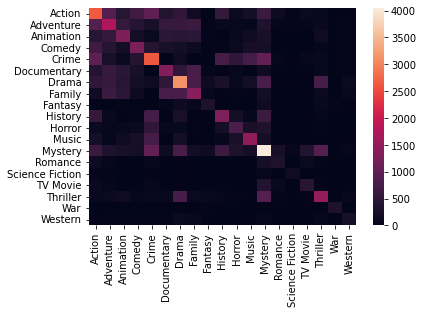

In [11]:
import seaborn as sns
annot_lookup = []
for i in range(len(nr_ids)):
    annot_lookup.append(nr_ids[i])
sns.heatmap(visGrid, xticklabels=annot_lookup, yticklabels=annot_lookup)

In [14]:
import matplotlib.pyplot as plt

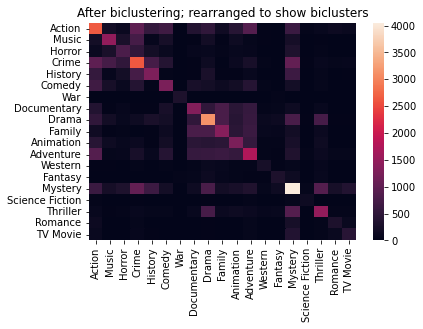

In [15]:
from sklearn.cluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters=5)
model.fit(visGrid)

fit_data = visGrid[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

annot_lookup_sorted = []
for i in np.argsort(model.row_labels_):
    annot_lookup_sorted.append(nr_ids[i])

sns.heatmap(fit_data, xticklabels=annot_lookup_sorted, yticklabels=annot_lookup_sorted, annot=False)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

In [16]:
for i in tqdm(range(len(lab))):
    label=lab.loc[i,'label']
    ds=dx[dx['label']==label]
    lab.loc[i,'count']=len(ds)
lab 


  0%|          | 0/19 [00:00<?, ?it/s]

,label,no,count
0,Action,0.0,2653.0
1,Adventure,1.0,1759.0
2,Fantasy,2.0,1255.0
3,Science Fiction,3.0,1255.0
4,Thriller,4.0,2636.0
5,Animation,5.0,1343.0
6,Comedy,6.0,3139.0
7,Family,7.0,1375.0
8,Music,8.0,316.0
9,Crime,9.0,1289.0


In [23]:
lab1=lab.sort_values(by=['count'], ascending=True)
lab1

,label,no,count
14,Western,14.0,146.0
18,TV Movie,18.0,246.0
17,Documentary,17.0,309.0
13,War,13.0,313.0
8,Music,8.0,316.0
15,History,15.0,436.0
10,Mystery,10.0,802.0
2,Fantasy,2.0,1255.0
3,Science Fiction,3.0,1255.0
9,Crime,9.0,1289.0


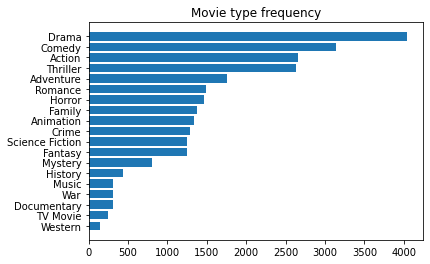

In [24]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
dis=lab1
a = dis['label']
b = dis['count']
plt.barh(a, b)  
plt.title('Movie type frequency')
plt.show()